In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.4.1/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(0,60,5)
Lon_Bins = Create_Bins(-95,0,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [9]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs(ET_DF, Model, i):
#
# Plot Tropical Peak Locations
    Axis = Fig.add_subplot(3,3,3*i+1, projection=ccrs.PlateCarree())
    ET_DF_Trop_Peak = ET_DF[ET_DF["Trop Peak SLP"] <= 1000]
    Trop_Peak_Lats = numpy.array(ET_DF_Trop_Peak["Trop Peak Lat"])
    Trop_Peak_Lons = numpy.array(ET_DF_Trop_Peak["Trop Peak Lon"])
    for k in range(len(Trop_Peak_Lats)):
        pyplot.scatter(Trop_Peak_Lons[k], Trop_Peak_Lats[k], marker='*', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i, -100, 0, 0, 60)
    Title = Model + ": Trop Peak Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Begin Locations
    Axis = Fig.add_subplot(3,3,3*i+2, projection=ccrs.PlateCarree())
    ET_DF_Begin = ET_DF[ET_DF["ET Begin SLP"] <= 1008]
    Begin_Lats = numpy.array(ET_DF_Begin["ET Begin Lat"])
    Begin_Lons = numpy.array(ET_DF_Begin["ET Begin Lon"])
    for k in range(len(Begin_Lats)):
        pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+1, -100, 0, 0, 60)
    Title = Model + ": ET Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Complete Data
    Axis = Fig.add_subplot(3,3,3*i+3, projection=ccrs.PlateCarree())
    ET_DF_Compl = ET_DF[ET_DF["ET Complete SLP"] <= 1008]
    Compl_Lats = numpy.array(ET_DF_Compl["ET Complete Lat"])
    Compl_Lons = numpy.array(ET_DF_Compl["ET Complete Lon"])
    for k in range(len(Compl_Lats)):
        pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+2, -100, 0, 0, 60)
    Title = Model + ": ET Completion Locations"
    Axis.set_title(Title, fontsize=24)

In [10]:
def Plot_Map_Formatting(Axis, Plot, x_Min, x_Max, y_Min, y_Max):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    Letter_Label(Axis, Plot)

In [11]:
# Create Function to Calculate ET Locations Spatial Distribution
def ET_Locs_Distr(ET_DF, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model):
    Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    ET_DF_Var = ET_DF[(ET_DF[Var+" SLP"] <= SLP_Up_Bound) & (ET_DF[Var+" SLP"] >= SLP_Low_Bound)]
    Lat_Var, Lon_Var = str(Var+" Lat"), str(Var+" Lon")
#
# Count ET Locations Distribution
    Params_Lat = Create_Bins(0,5,1.25)
    Params_Lon = Create_Bins(0,5,1.25)
    for j in range(len(Lat_Bins)-1):
        for k in range(len(Lon_Bins)-1):
            Count[j][k] = Loc_Count(ET_DF_Var, Lat_Var, Lon_Var, Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon, False)
#
# Calculate ET Locations Density
    Density = Count / numpy.sum(Count) * 200
    return (Density)

In [12]:
# Count ET Locations Distribution
def Loc_Count(DF, Lat_Var, Lon_Var, Lat_Min, Lat_Max, Lon_Min, Lon_Max, Params_Lat, Params_Lon, Zero):
    if Zero == False:
        Count_Total = 0
        for m in range(len(Params_Lat)):
            for n in range(len(Params_Lon)):
                Param_Lat, Param_Lon = Params_Lat[m], Params_Lon[n]
                Subset = DF[(DF[Lat_Var] >= Lat_Min-Param_Lat) & (DF[Lat_Var] <= Lat_Max+Param_Lat) &
                (DF[Lon_Var] >= Lon_Min-Param_Lon) & (DF[Lon_Var] <= Lon_Max+Param_Lon)]
                Count = len(Subset)
                Count_Total += Count
        Count_Final = Count_Total / (len(Params_Lat) * len(Params_Lon))
    elif Zero == True:
        Subset = DF[(DF[Lat_Var] >= Lat_Min) & (DF[Lat_Var] <= Lat_Max) &
        (DF[Lon_Var] >= Lon_Min) & (DF[Lon_Var] <= Lon_Max)]
        Count = len(Subset)
        if Count > 0:
            Count_Total = 0
            for m in range(len(Params_Lat)):
                for n in range(len(Params_Lon)):
                    Param_Lat, Param_Lon = Params_Lat[m], Params_Lon[n]
                    Subset = DF[(DF[Lat_Var] >= Lat_Min-Param_Lat) & (DF[Lat_Var] <= Lat_Max+Param_Lat) &
                    (DF[Lon_Var] >= Lon_Min-Param_Lon) & (DF[Lon_Var] <= Lon_Max+Param_Lon)]
                    Count = len(Subset)
                    Count_Total += Count
            Count_Final = Count_Total / (len(Params_Lat) * len(Params_Lon))
        else:
            Count_Final = 0
    return (Count_Final)

In [13]:
# Create Function to Plot ET Begin and Complete Locations
def ET_Distr_Plot(ET_DF, Model, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Spatial_Trop_Peak = ET_Locs_Distr(ET_DF, "Trop Peak", 1000, 728, Lat_Bins, Lon_Bins, Model)
    Spatial_Begin = ET_Locs_Distr(ET_DF, "ET Begin", 1008, 728, Lat_Bins, Lon_Bins, Model)
    Spatial_Compl = ET_Locs_Distr(ET_DF, "ET Complete", 1008, 728, Lat_Bins, Lon_Bins, Model)
#
# Plot Trop_Peak Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trop_Peak)):
        for k in range(len(Spatial_Trop_Peak[0])):
            Colour = Spatial_Colour(Spatial_Trop_Peak[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model + ": Tropical Peak Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Plot ET Begin Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Begin)):
        for k in range(len(Spatial_Begin[0])):
            Colour = Spatial_Colour(Spatial_Begin[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model + ": ET Initiation Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency (Per 200 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot ET Complete Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Compl)):
        for k in range(len(Spatial_Compl[0])):
            Colour = Spatial_Colour(Spatial_Compl[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model + ": ET Completion Distribution"
    Axis.set_title(Title, fontsize=20)

In [14]:
# Calculate Difference Between Models
def ET_Locs_Diff(ET_DF_1, ET_DF_2, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_1, Model_2):
    Density_1 = ET_Locs_Distr(ET_DF_1, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_1)
    Density_2 = ET_Locs_Distr(ET_DF_2, Var, SLP_Up_Bound, SLP_Low_Bound, Lat_Bins, Lon_Bins, Model_2)
    Diff = Density_1 - Density_2
    return (Diff)

In [28]:
# Create Function to Plot ET Begin and Complete Locations
def ET_Diff_Plot(ET_DF_1, ET_DF_2, Model_1, Model_2, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Diff_Trop_Peak = ET_Locs_Diff(ET_DF_1, ET_DF_2, "Trop Peak", 1000, 728, Lat_Bins, Lon_Bins, Model_1, Model_2)
    Diff_Begin = ET_Locs_Diff(ET_DF_1, ET_DF_2, "ET Begin", 1008, 728, Lat_Bins, Lon_Bins, Model_1, Model_2)
    Diff_Compl = ET_Locs_Diff(ET_DF_1, ET_DF_2, "ET Complete", 1008, 728, Lat_Bins, Lon_Bins, Model_1, Model_2)
#
# Plot Tropical Peak Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Trop_Peak)):
        for k in range(len(Diff_Trop_Peak[0])):
            Colour = Spatial_Diff_Colour(Diff_Trop_Peak[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Tropical Peak Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Plot ET Begin Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Begin)):
        for k in range(len(Diff_Begin[0])):
            Colour = Spatial_Diff_Colour(Diff_Begin[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in ET Initiation Distribution"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency Diff (Per 200 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot ET Complete Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Diff_Compl)):
        for k in range(len(Diff_Compl[0])):
            Colour = Spatial_Diff_Colour(Diff_Compl[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in ET Completion Distribution"
    Axis.set_title(Title, fontsize=20)

In [16]:
# Create Subsets For Storm Phase Cumulative Distributions
def Phase_Subsets(Data):
    Subset_0 = Data[Data["SLP(hPa)"] <= 1008].reset_index()
    Subset_Trop = Subset_0[Subset_0["Storm Phase"] == "Tropical"]
    Subset_Trans = Subset_0[Subset_0["Storm Phase"] == "Transition"]
    Subset_Extra = Subset_0[Subset_0["Storm Phase"] == "Extratropical"]
    return (Subset_0, Subset_Trop, Subset_Trans, Subset_Extra)

In [17]:
# Create Function to Calculate Spatial Distribution By Phase
def Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model):
# Create Subsets Based on Phase
    Subset_0, Subset_Trop, Subset_Trans, Subset_Extra = Phase_Subsets(Data_DF)
    Trop_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Trans_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Extra_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
#
# Count Distribution of Datapoints By Phase
    Params_Lat = Create_Bins(0,5,1.25)
    Params_Lon = Create_Bins(0,5,1.25)
    for j in range(len(Lat_Bins)-1):
        for k in range(len(Lon_Bins)-1):
            Trop_Count[j][k] = Loc_Count(Subset_Trop, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon, False)
            Trans_Count[j][k] = Loc_Count(Subset_Trans, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon, False)
            Extra_Count[j][k] = Loc_Count(Subset_Extra, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon, False)
#
# Calculate Density
    Trop_Density = Trop_Count / numpy.sum(Trop_Count) * 1000
    Trans_Density = Trans_Count / numpy.sum(Trans_Count) * 1000
    Extra_Density = Extra_Count / numpy.sum(Extra_Count) * 1000
    return (Trop_Density, Trans_Density, Extra_Density)

In [18]:
# Create Function to Plot Storm Locations Based on Phase
def Phase_Distr_Plot(Data_DF, Model, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Spatial_Trop, Spatial_Trans, Spatial_Extra = Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model)
#
# Plot Tropical Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trop)):
        for k in range(len(Spatial_Trop[0])):
            Colour = Spatial_Colour(Spatial_Trop[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model + ": Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Distrbution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trans)):
        for k in range(len(Spatial_Trans[0])):
            Colour = Spatial_Colour(Spatial_Trans[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model + ": Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Extra)):
        for k in range(len(Spatial_Extra[0])):
            Colour = Spatial_Colour(Spatial_Extra[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model + ": Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [19]:
# Calculate Difference Between Models
def Phase_Locs_Diff(DF_1, DF_2, Model_1, Model_2):
    Trop_1, Trans_1, Extra_1 = Phase_Locs_Distr(DF_1, Lat_Bins, Lon_Bins, Model_1)
    Trop_2, Trans_2, Extra_2 = Phase_Locs_Distr(DF_2, Lat_Bins, Lon_Bins, Model_2)
    Trop_Diff = Trop_1 - Trop_2
    Trans_Diff = Trans_1 - Trans_2
    Extra_Diff = Extra_1 - Extra_2
    return (Trop_Diff, Trans_Diff, Extra_Diff)

In [20]:
# Create Function to Plot Spatial Distribution By Phase
def Phase_Diff_Plot(Data_DF_1, Data_DF_2, Model_1, Model_2, i, Bounds, Colours, Colourbar):
    Trop_Diff, Trans_Diff, Extra_Diff = Phase_Locs_Diff(Data_DF_1, Data_DF_2, Model_1, Model_2)
#
# Plot Tropical Distrbution
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Trop_Diff)):
        for k in range(len(Trop_Diff[0])):
            Colour = Spatial_Diff_Colour(Trop_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Distribution
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Trans_Diff)):
        for k in range(len(Trans_Diff[0])):
            Colour = Spatial_Diff_Colour(Trans_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency Diff (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Distribution
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Extra_Diff)):
        for k in range(len(Extra_Diff[0])):
            Colour = Spatial_Diff_Colour(Extra_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [21]:
# Create Function For ET Spatial Distribution Count Colours
ET_Colours = ['lightskyblue', 'deepskyblue', 'lightseagreen', 'limegreen', 'greenyellow', 'yellow', 'orange', 'red']
ET_Bounds = numpy.array([0,1,2,3,4,5,6,7])
Phase_Colours = ['lightskyblue', 'deepskyblue', 'lightseagreen', 'limegreen', 'greenyellow', 'yellow', 'orange', 'darkorange', 'red']
Phase_Bounds = numpy.array([0,2.5,5,7.5,10,15,20,25,30])
#
def Spatial_Colour(Density, Bounds, Colours):
    for k in range(len(Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Density, bins=Bounds[1:], right=True)
            Colour = Colours[Bin]
    return (Colour)

In [32]:
# Create Function of Colours of ET Locations Difference Plots
ET_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'red']
ET_Diff_Bounds = numpy.array([-2,-1.5,-1,-0.5,0.5,1,1.5,2])
Phase_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'red']
Phase_Diff_Bounds = numpy.array([-8,-6,-4,-2,2,4,6,8])
#
def Spatial_Diff_Colour(Diff, Bounds, Colours):
    for k in range(len(Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Diff, bins=Bounds, right=True)
            Colour = Colours[Bin]
    return (Colour)

In [23]:
# Letter Labels
def Letter_Label(Axis, Plot):
    Fig_Labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
    Axis.text(0.03, 0.92, str(Fig_Labels[int(Plot)]), ha='center', va='center', \
    transform=Axis.transAxes, fontdict={'size':24},color='black')

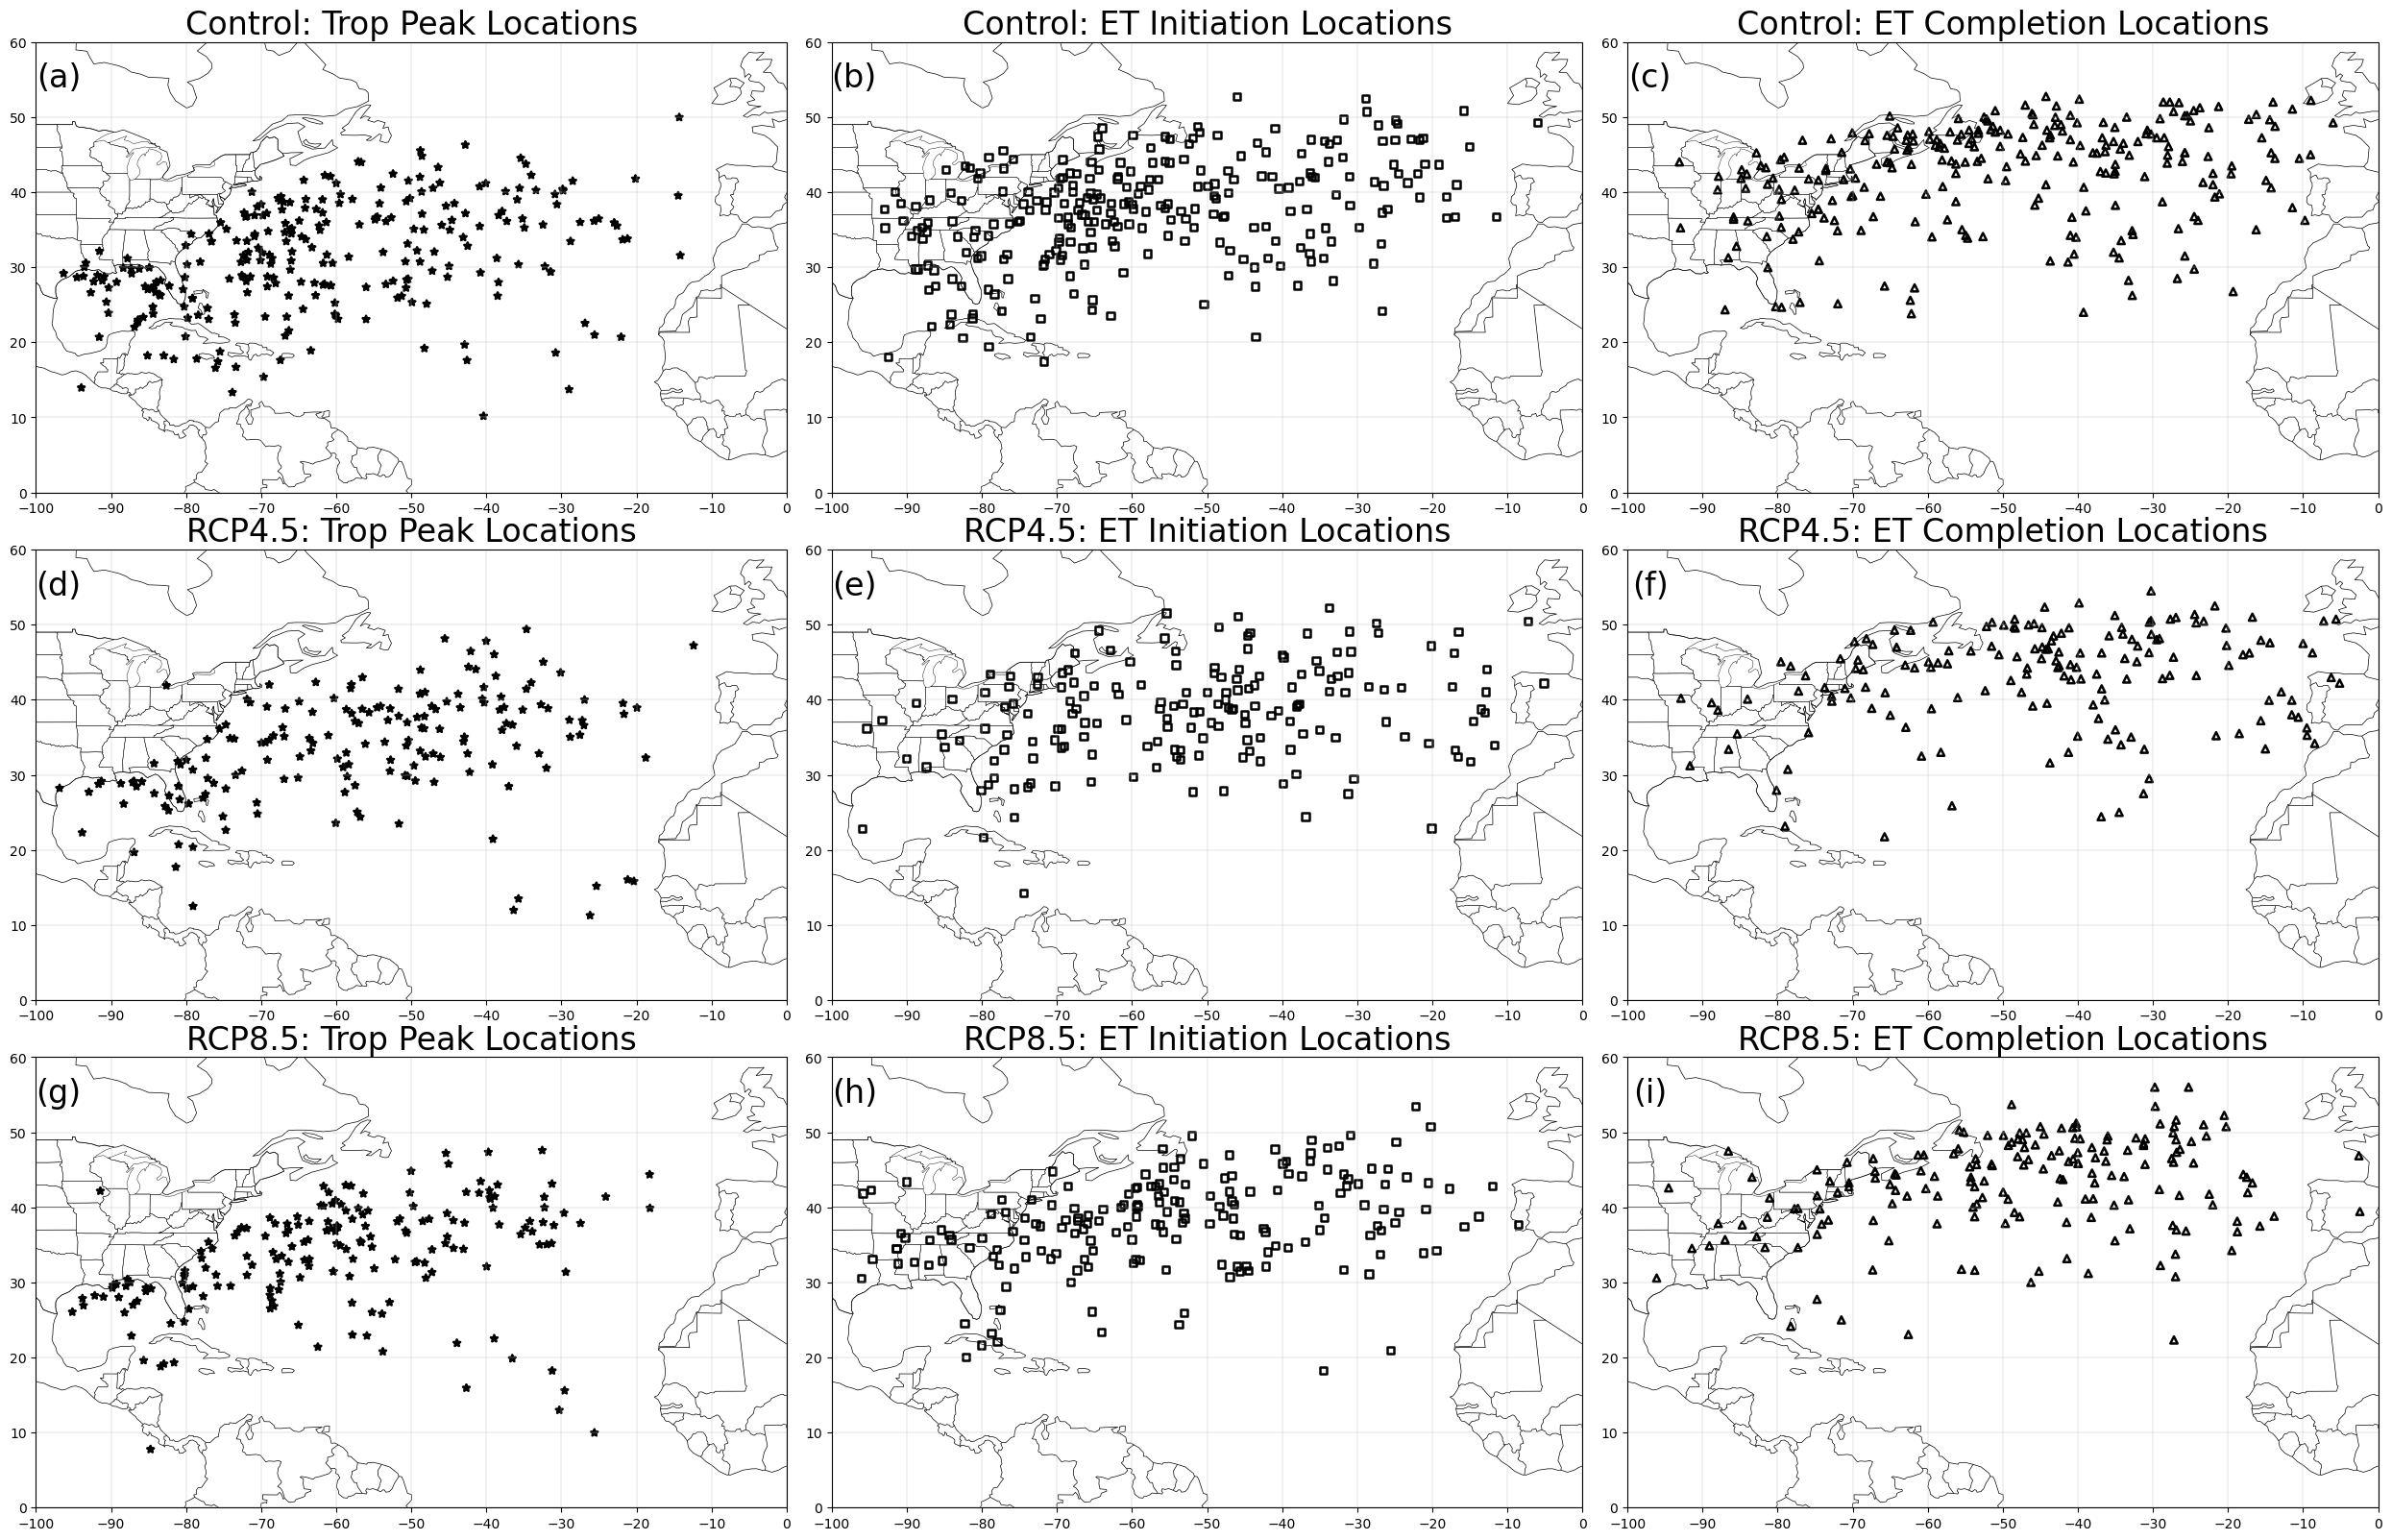

In [24]:
# Plot Tropical Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,16))
Plot_ET_Locs(Control_ET, "Control", 0)
Plot_ET_Locs(RCP45_ET, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Loc.png', bbox_inches='tight')

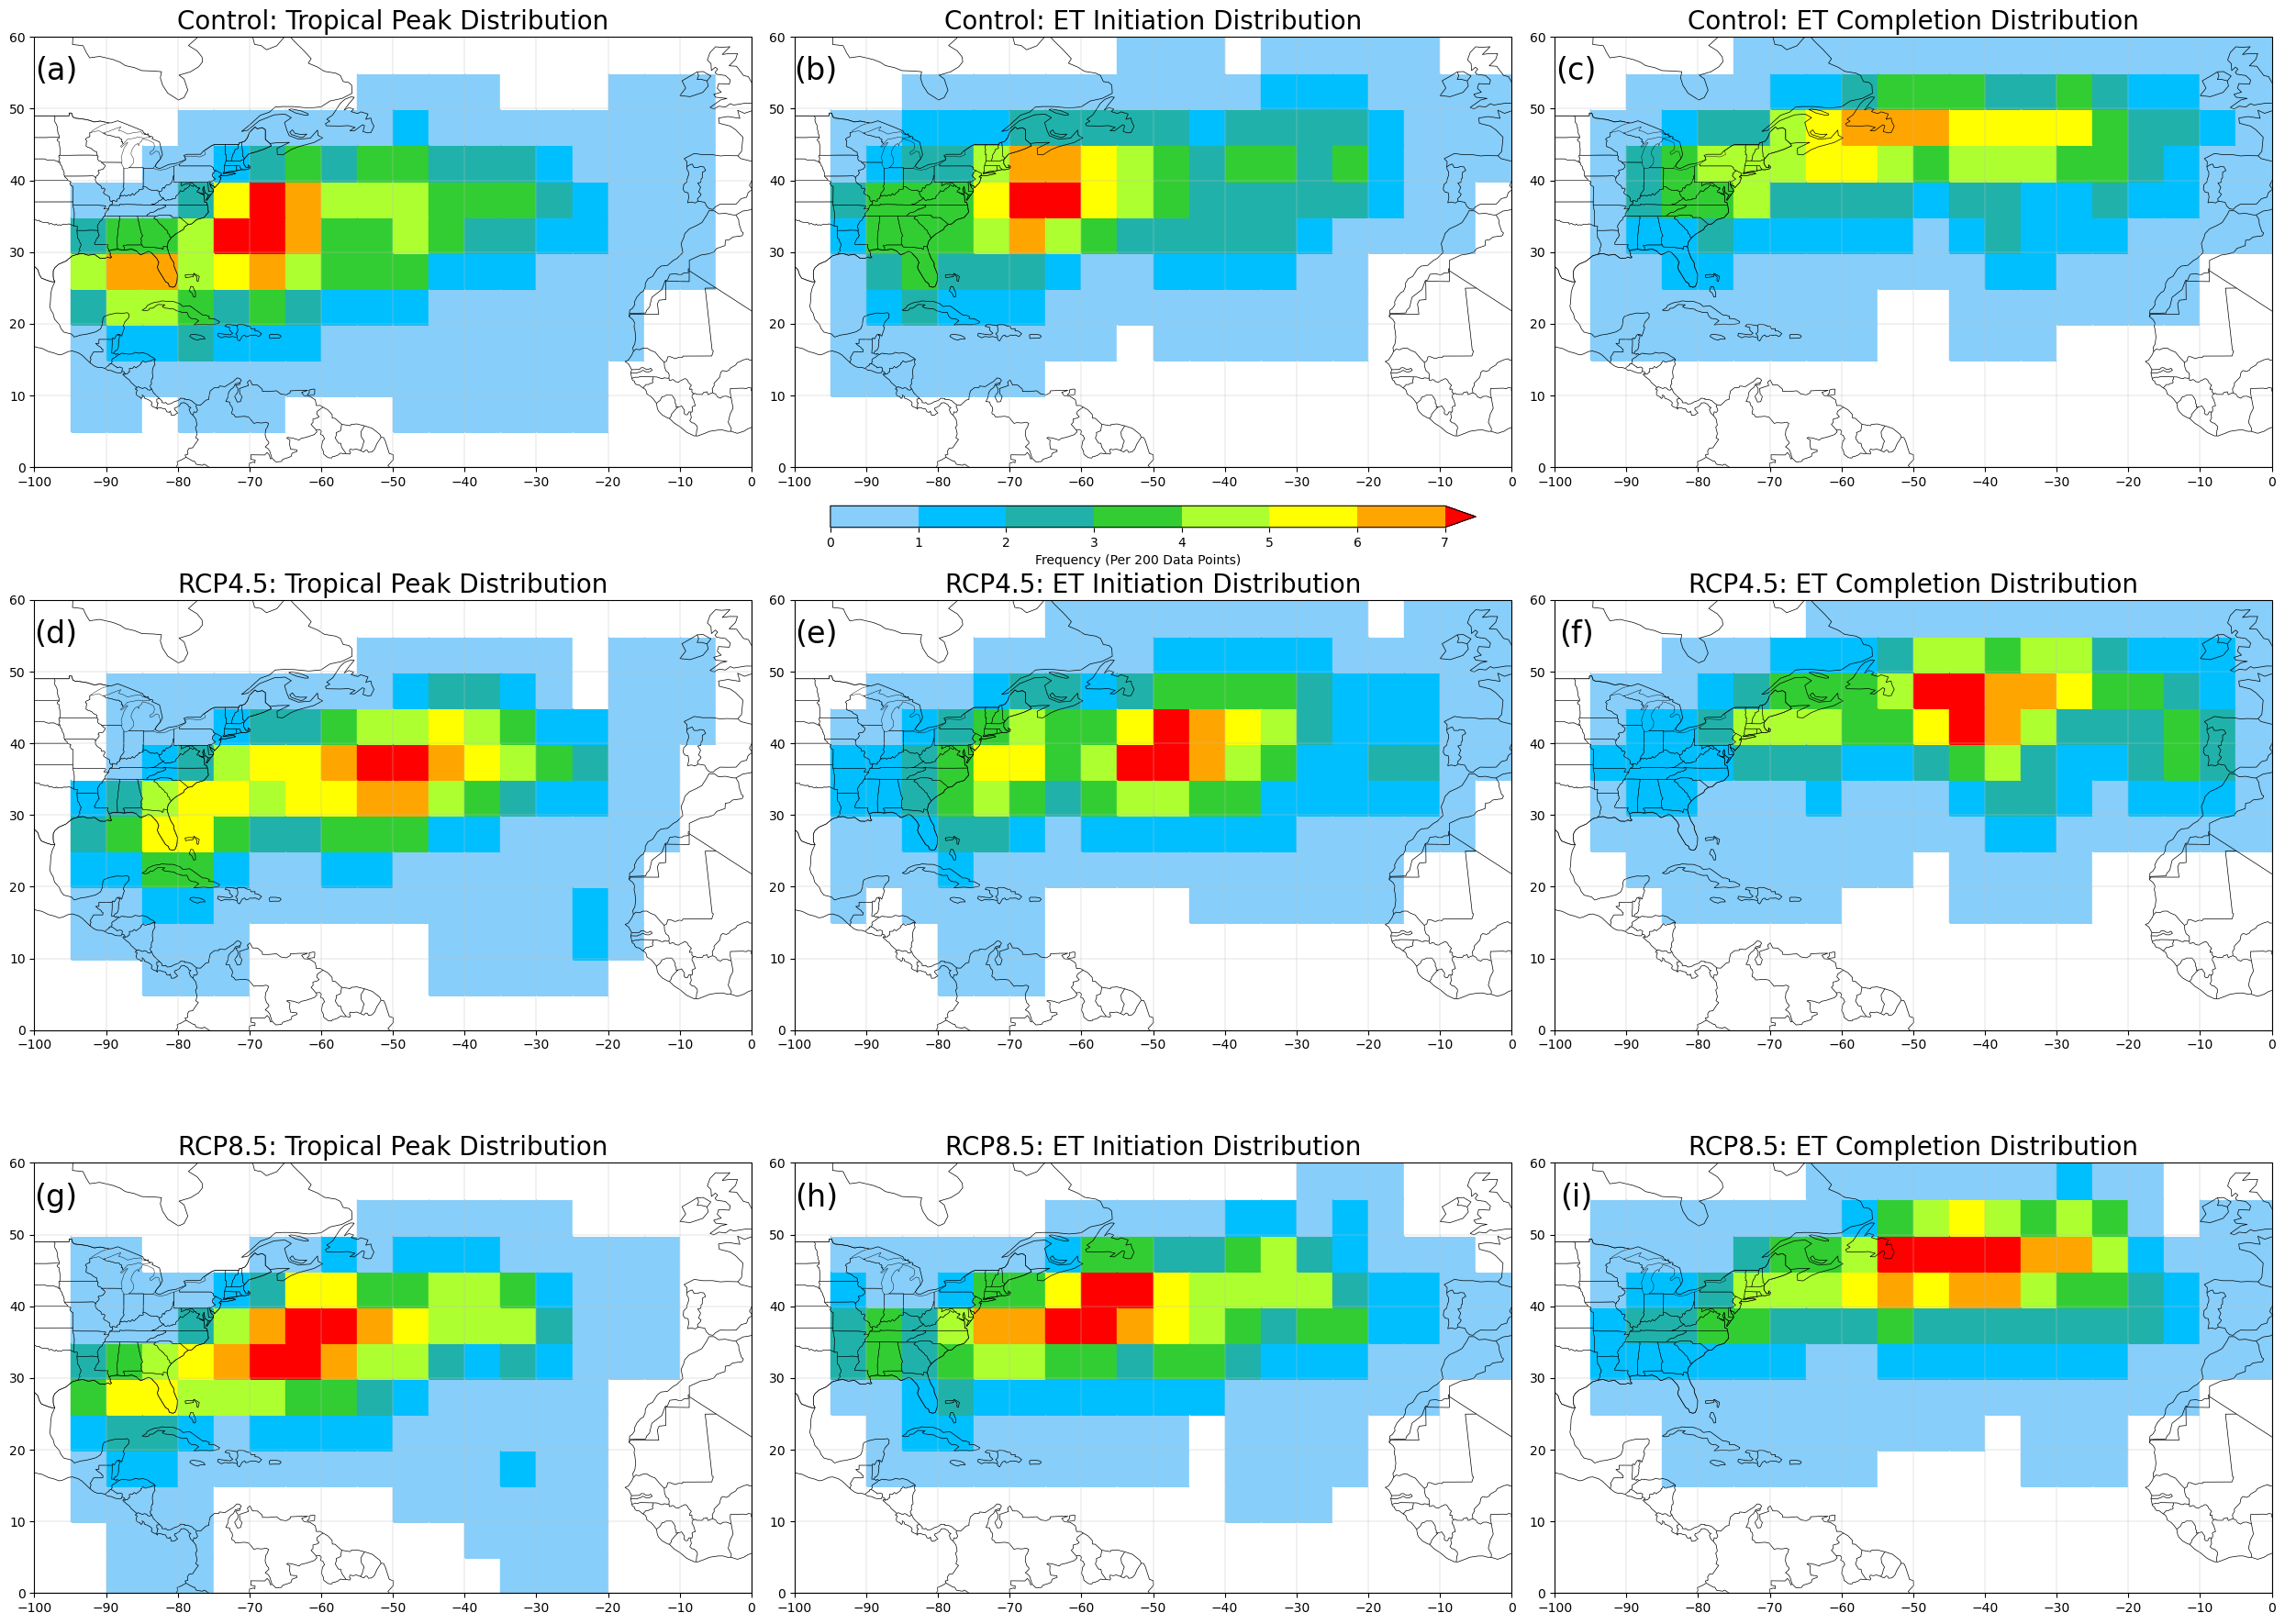

In [25]:
# Plot ET Initiation and Completion Spatial Distributions
Fig = pyplot.figure(figsize=(25,18))
ET_Distr_Plot(Control_ET, "Control", 0, ET_Bounds, ET_Colours, True)
ET_Distr_Plot(RCP45_ET, "RCP4.5", 1, ET_Bounds, ET_Colours, False)
ET_Distr_Plot(RCP85_ET, "RCP8.5", 2, ET_Bounds, ET_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Distr.png', bbox_inches='tight')

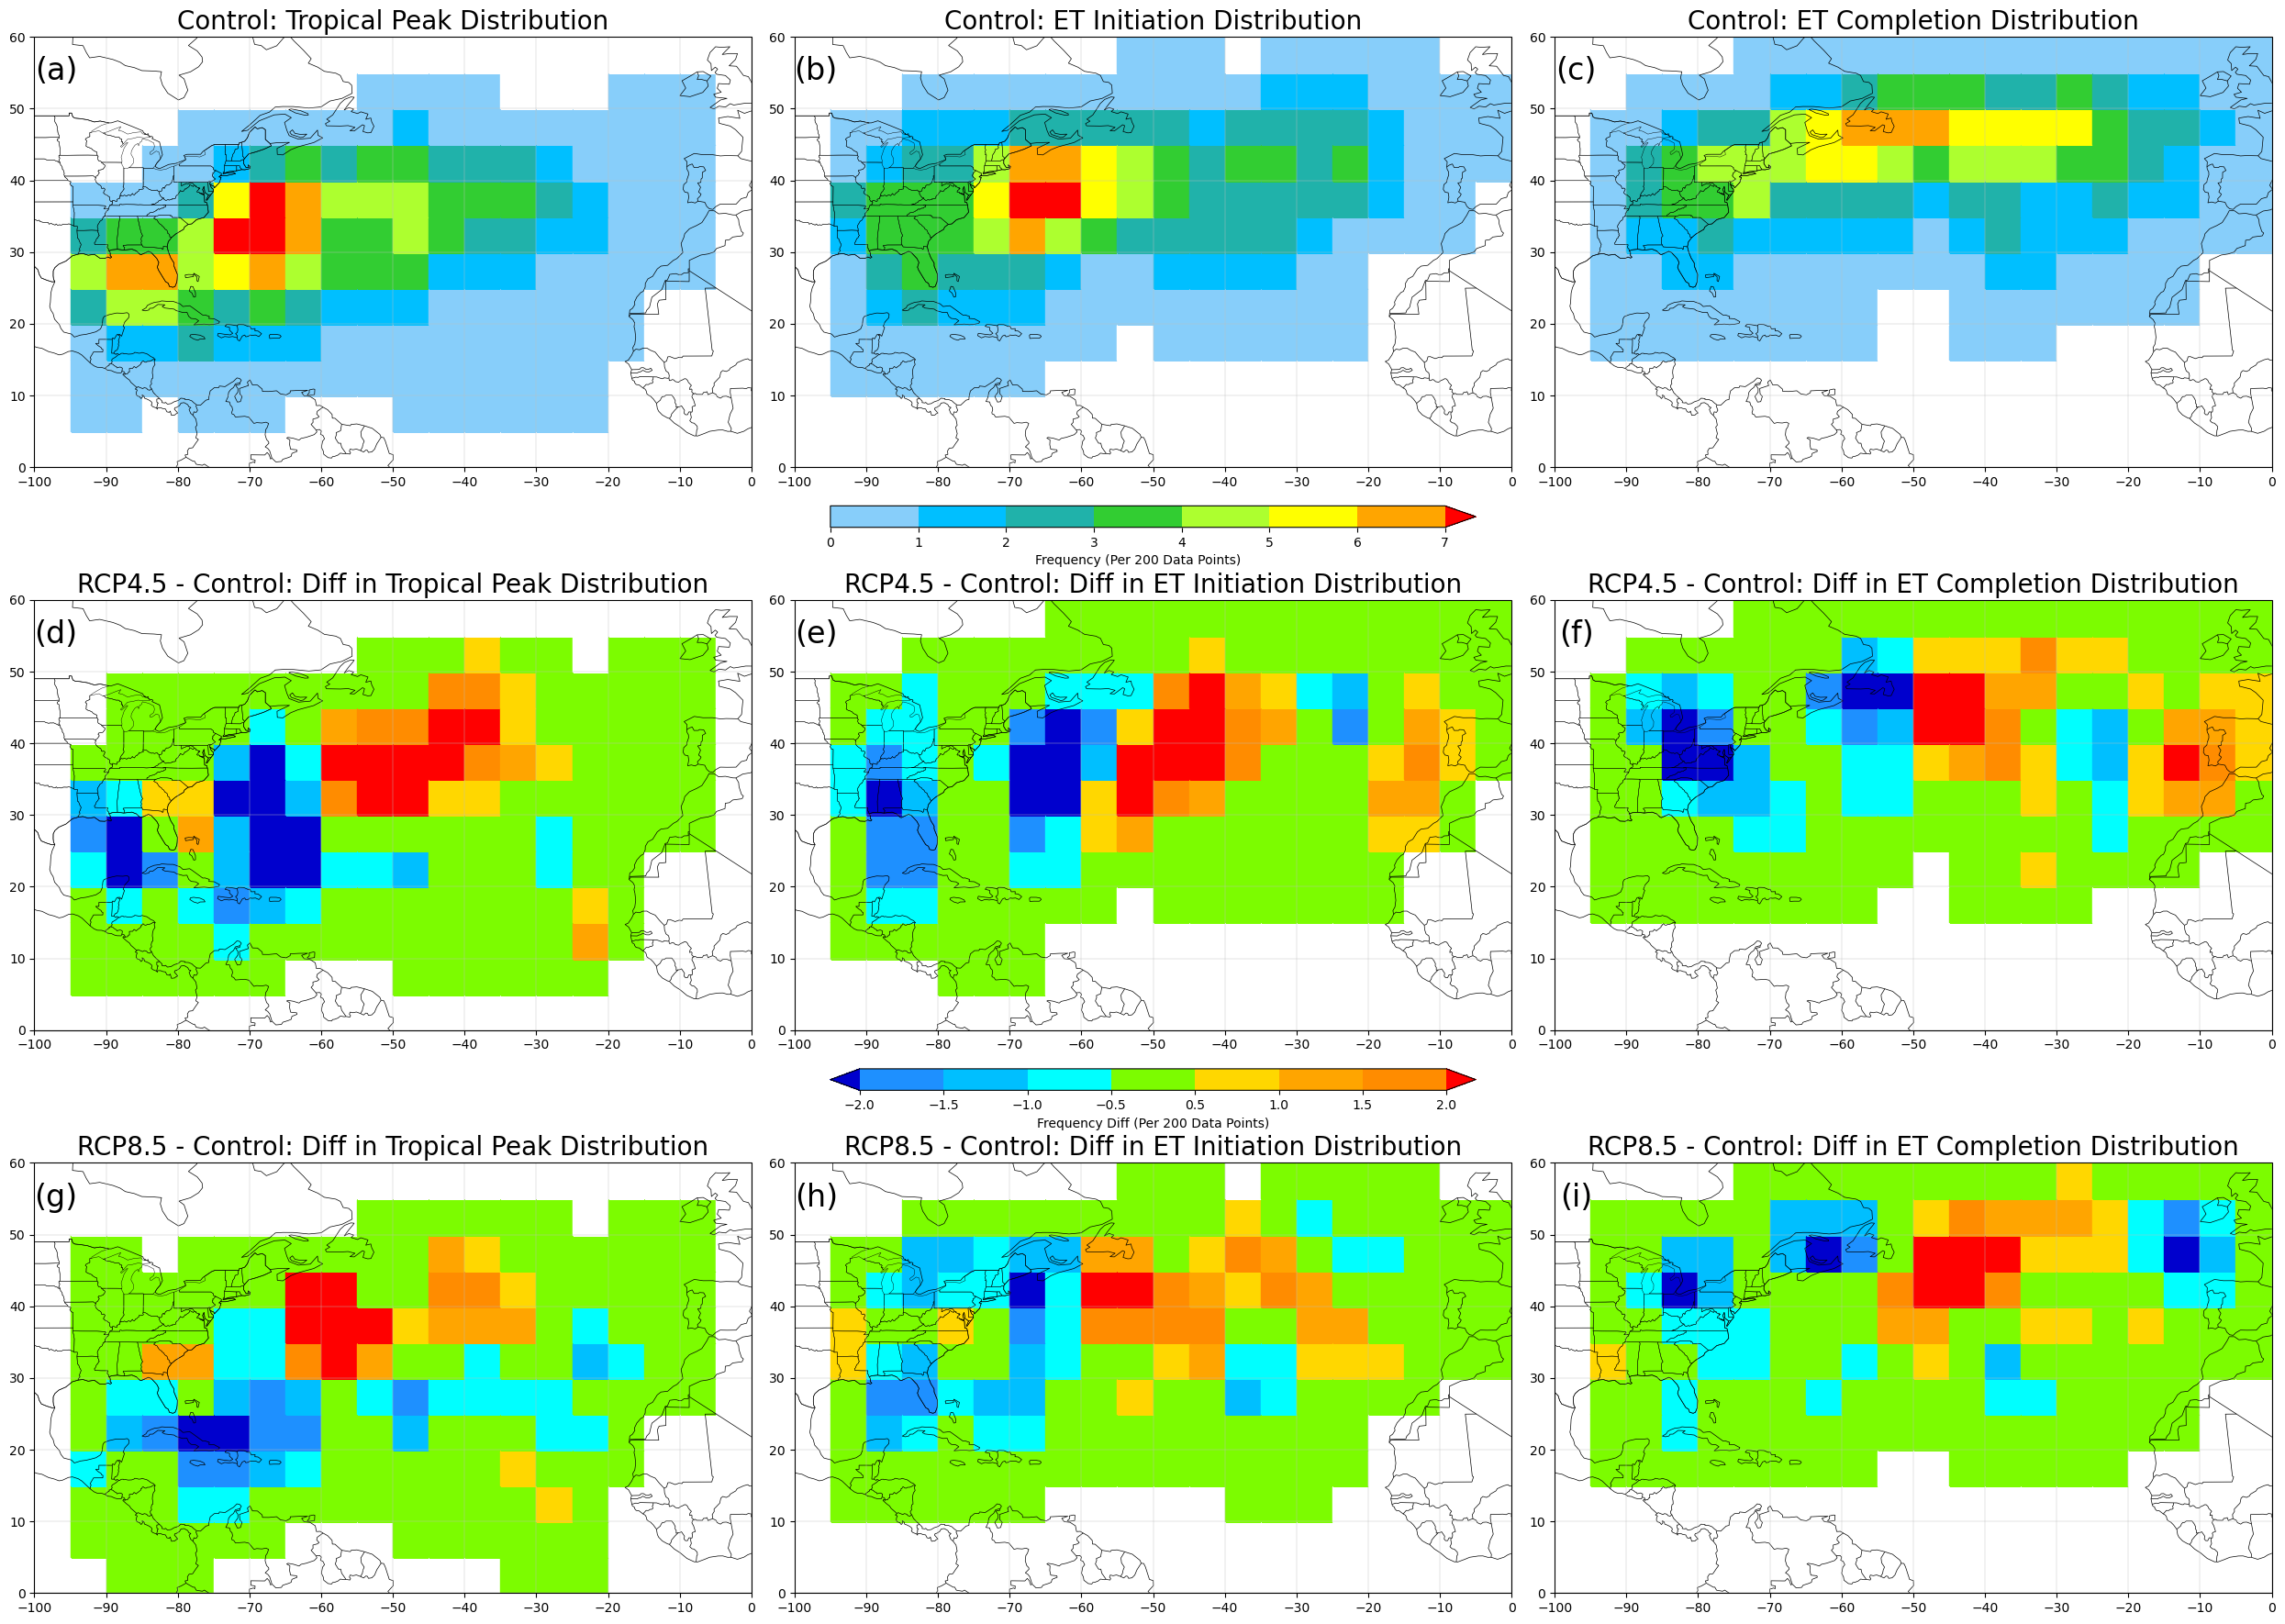

In [33]:
# Plot Differences Between ET Initiation and Completion Spatial Distributions
Fig = pyplot.figure(figsize=(25,18))
ET_Distr_Plot(Control_ET, "Control", 0, ET_Bounds, ET_Colours, True)
ET_Diff_Plot(RCP45_ET, Control_ET, "RCP4.5", "Control", 1, ET_Diff_Bounds, ET_Diff_Colours, True)
ET_Diff_Plot(RCP85_ET, Control_ET, "RCP8.5", "Control", 2, ET_Diff_Bounds, ET_Diff_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Diff.png', bbox_inches='tight')

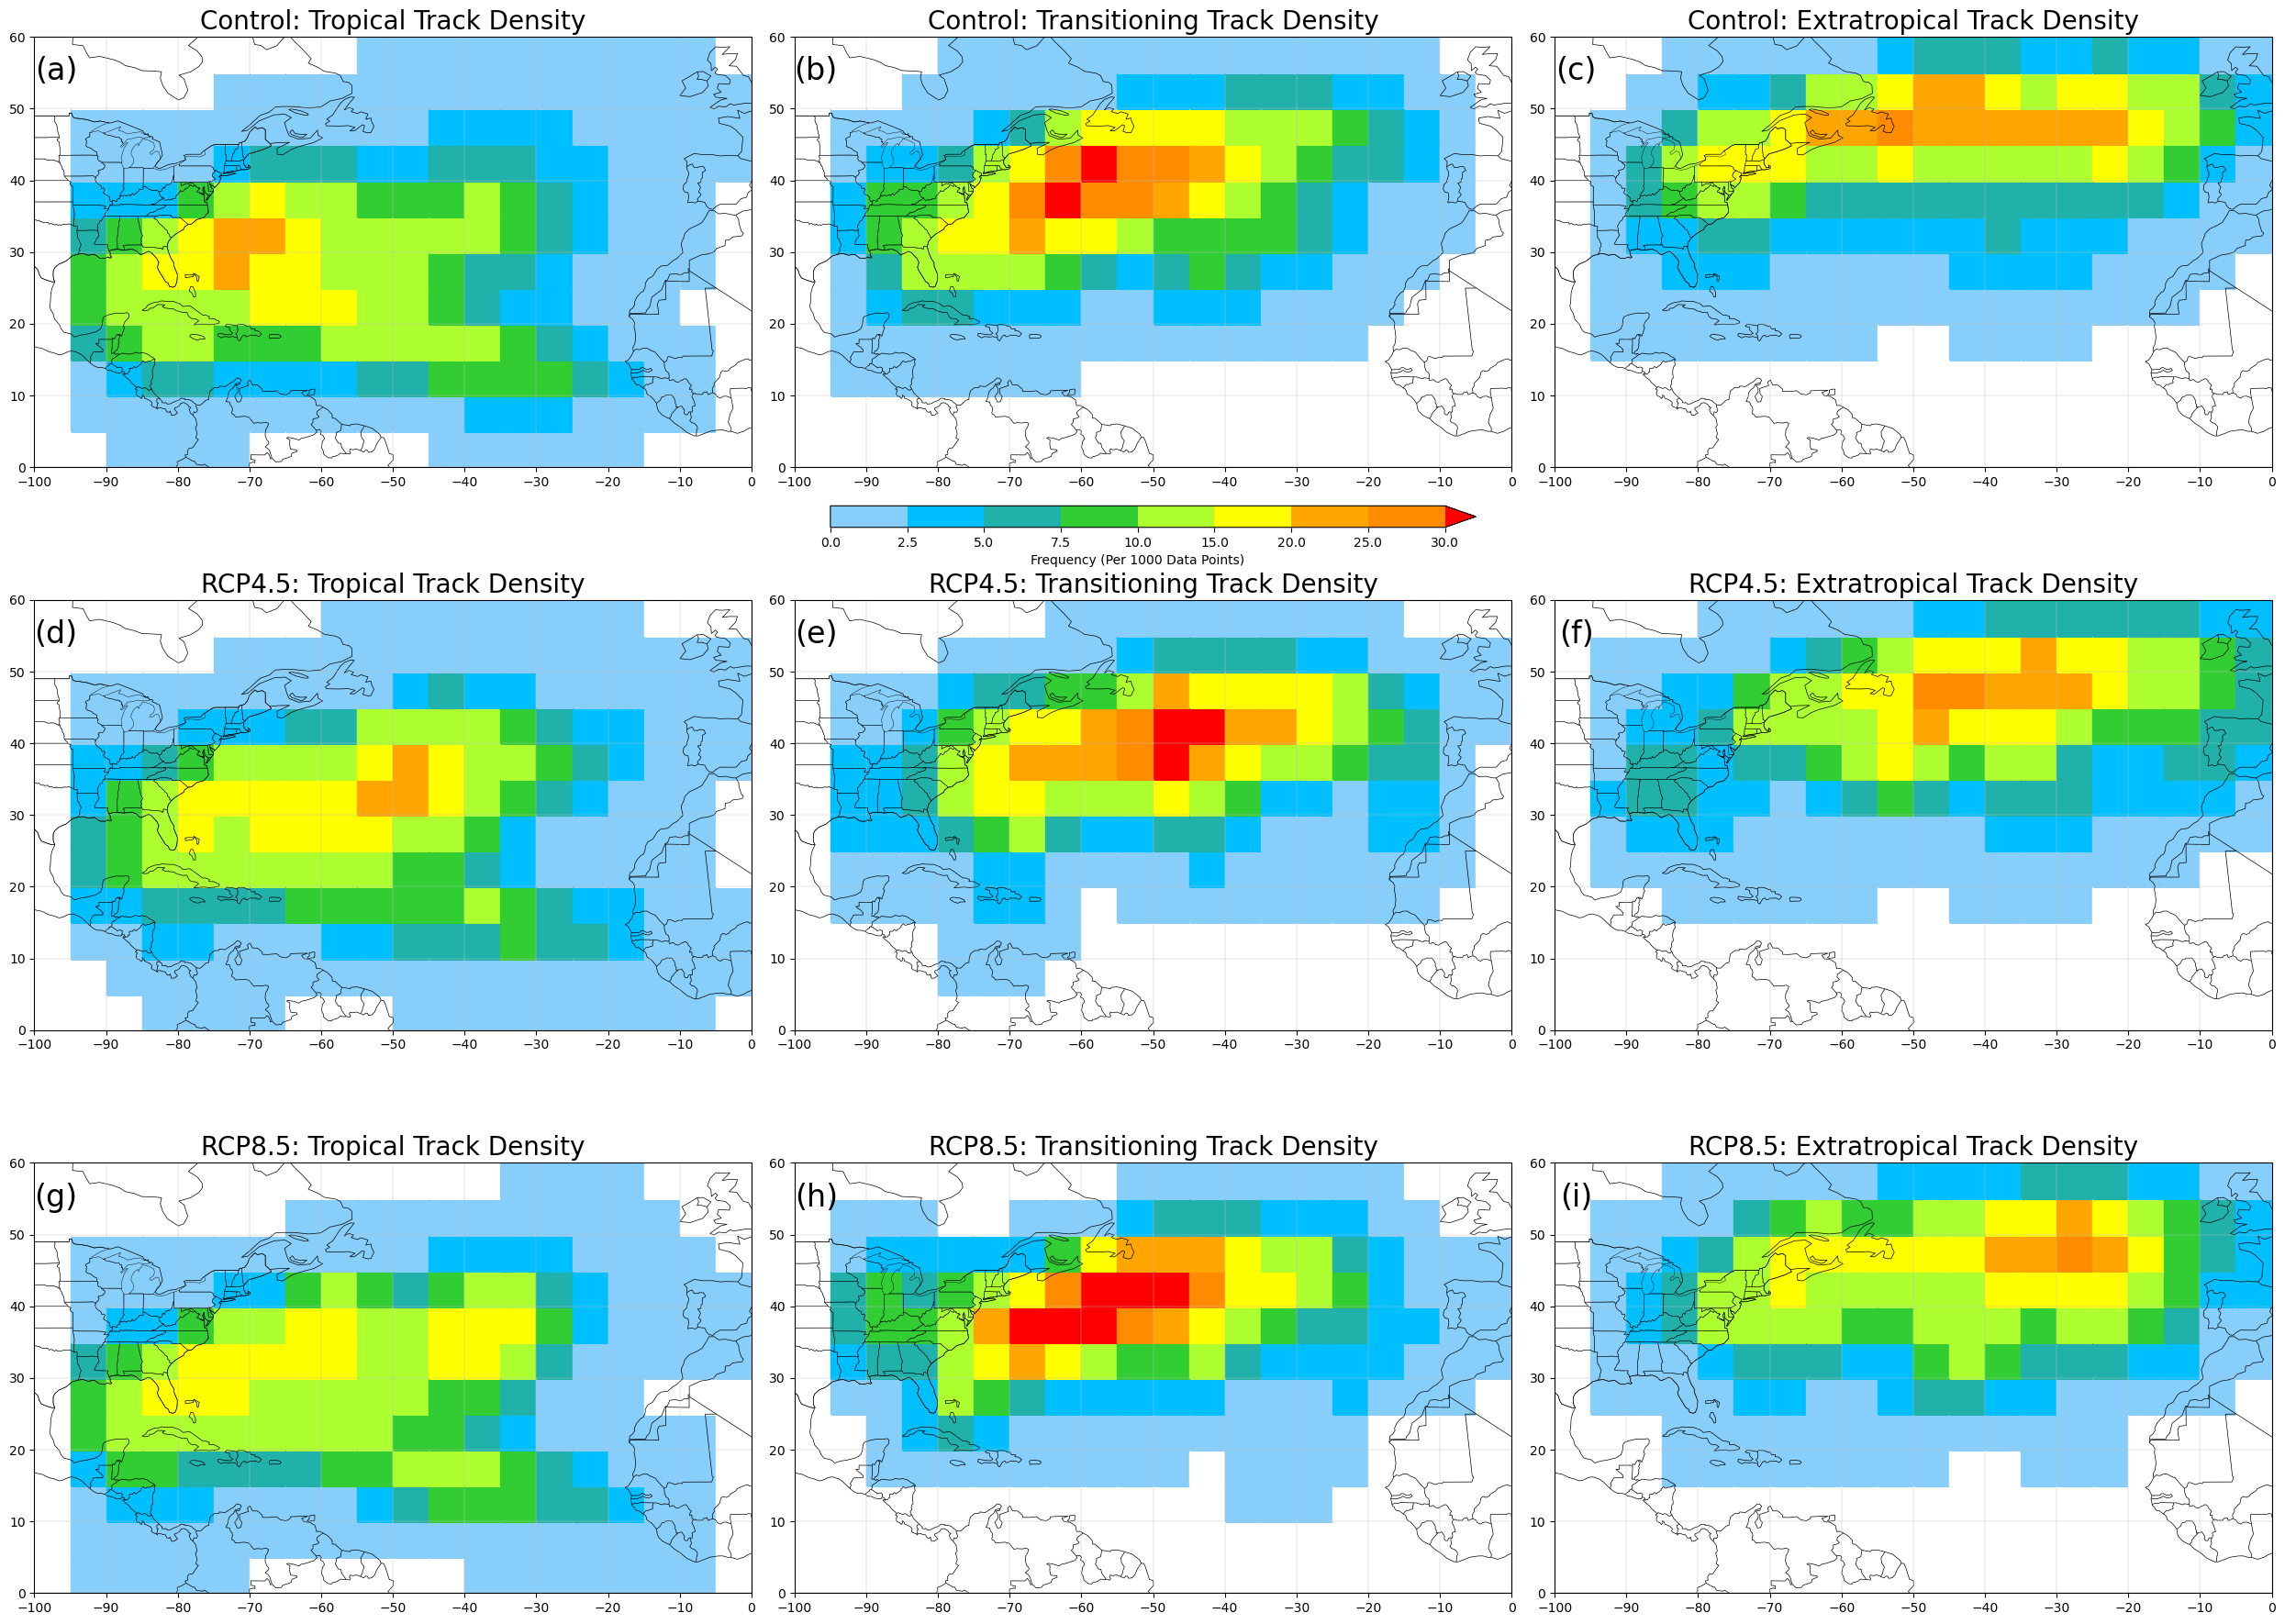

In [30]:
# Plot Spatial Distributions By Storm Phase
Fig = pyplot.figure(figsize=(25,18))
Phase_Distr_Plot(Control_Data, "Control", 0, Phase_Bounds, Phase_Colours, True)
Phase_Distr_Plot(RCP45_Data, "RCP4.5", 1, Phase_Bounds, Phase_Colours, False)
Phase_Distr_Plot(RCP85_Data, "RCP8.5", 2, Phase_Bounds, Phase_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Phase_Distr.png', bbox_inches='tight')

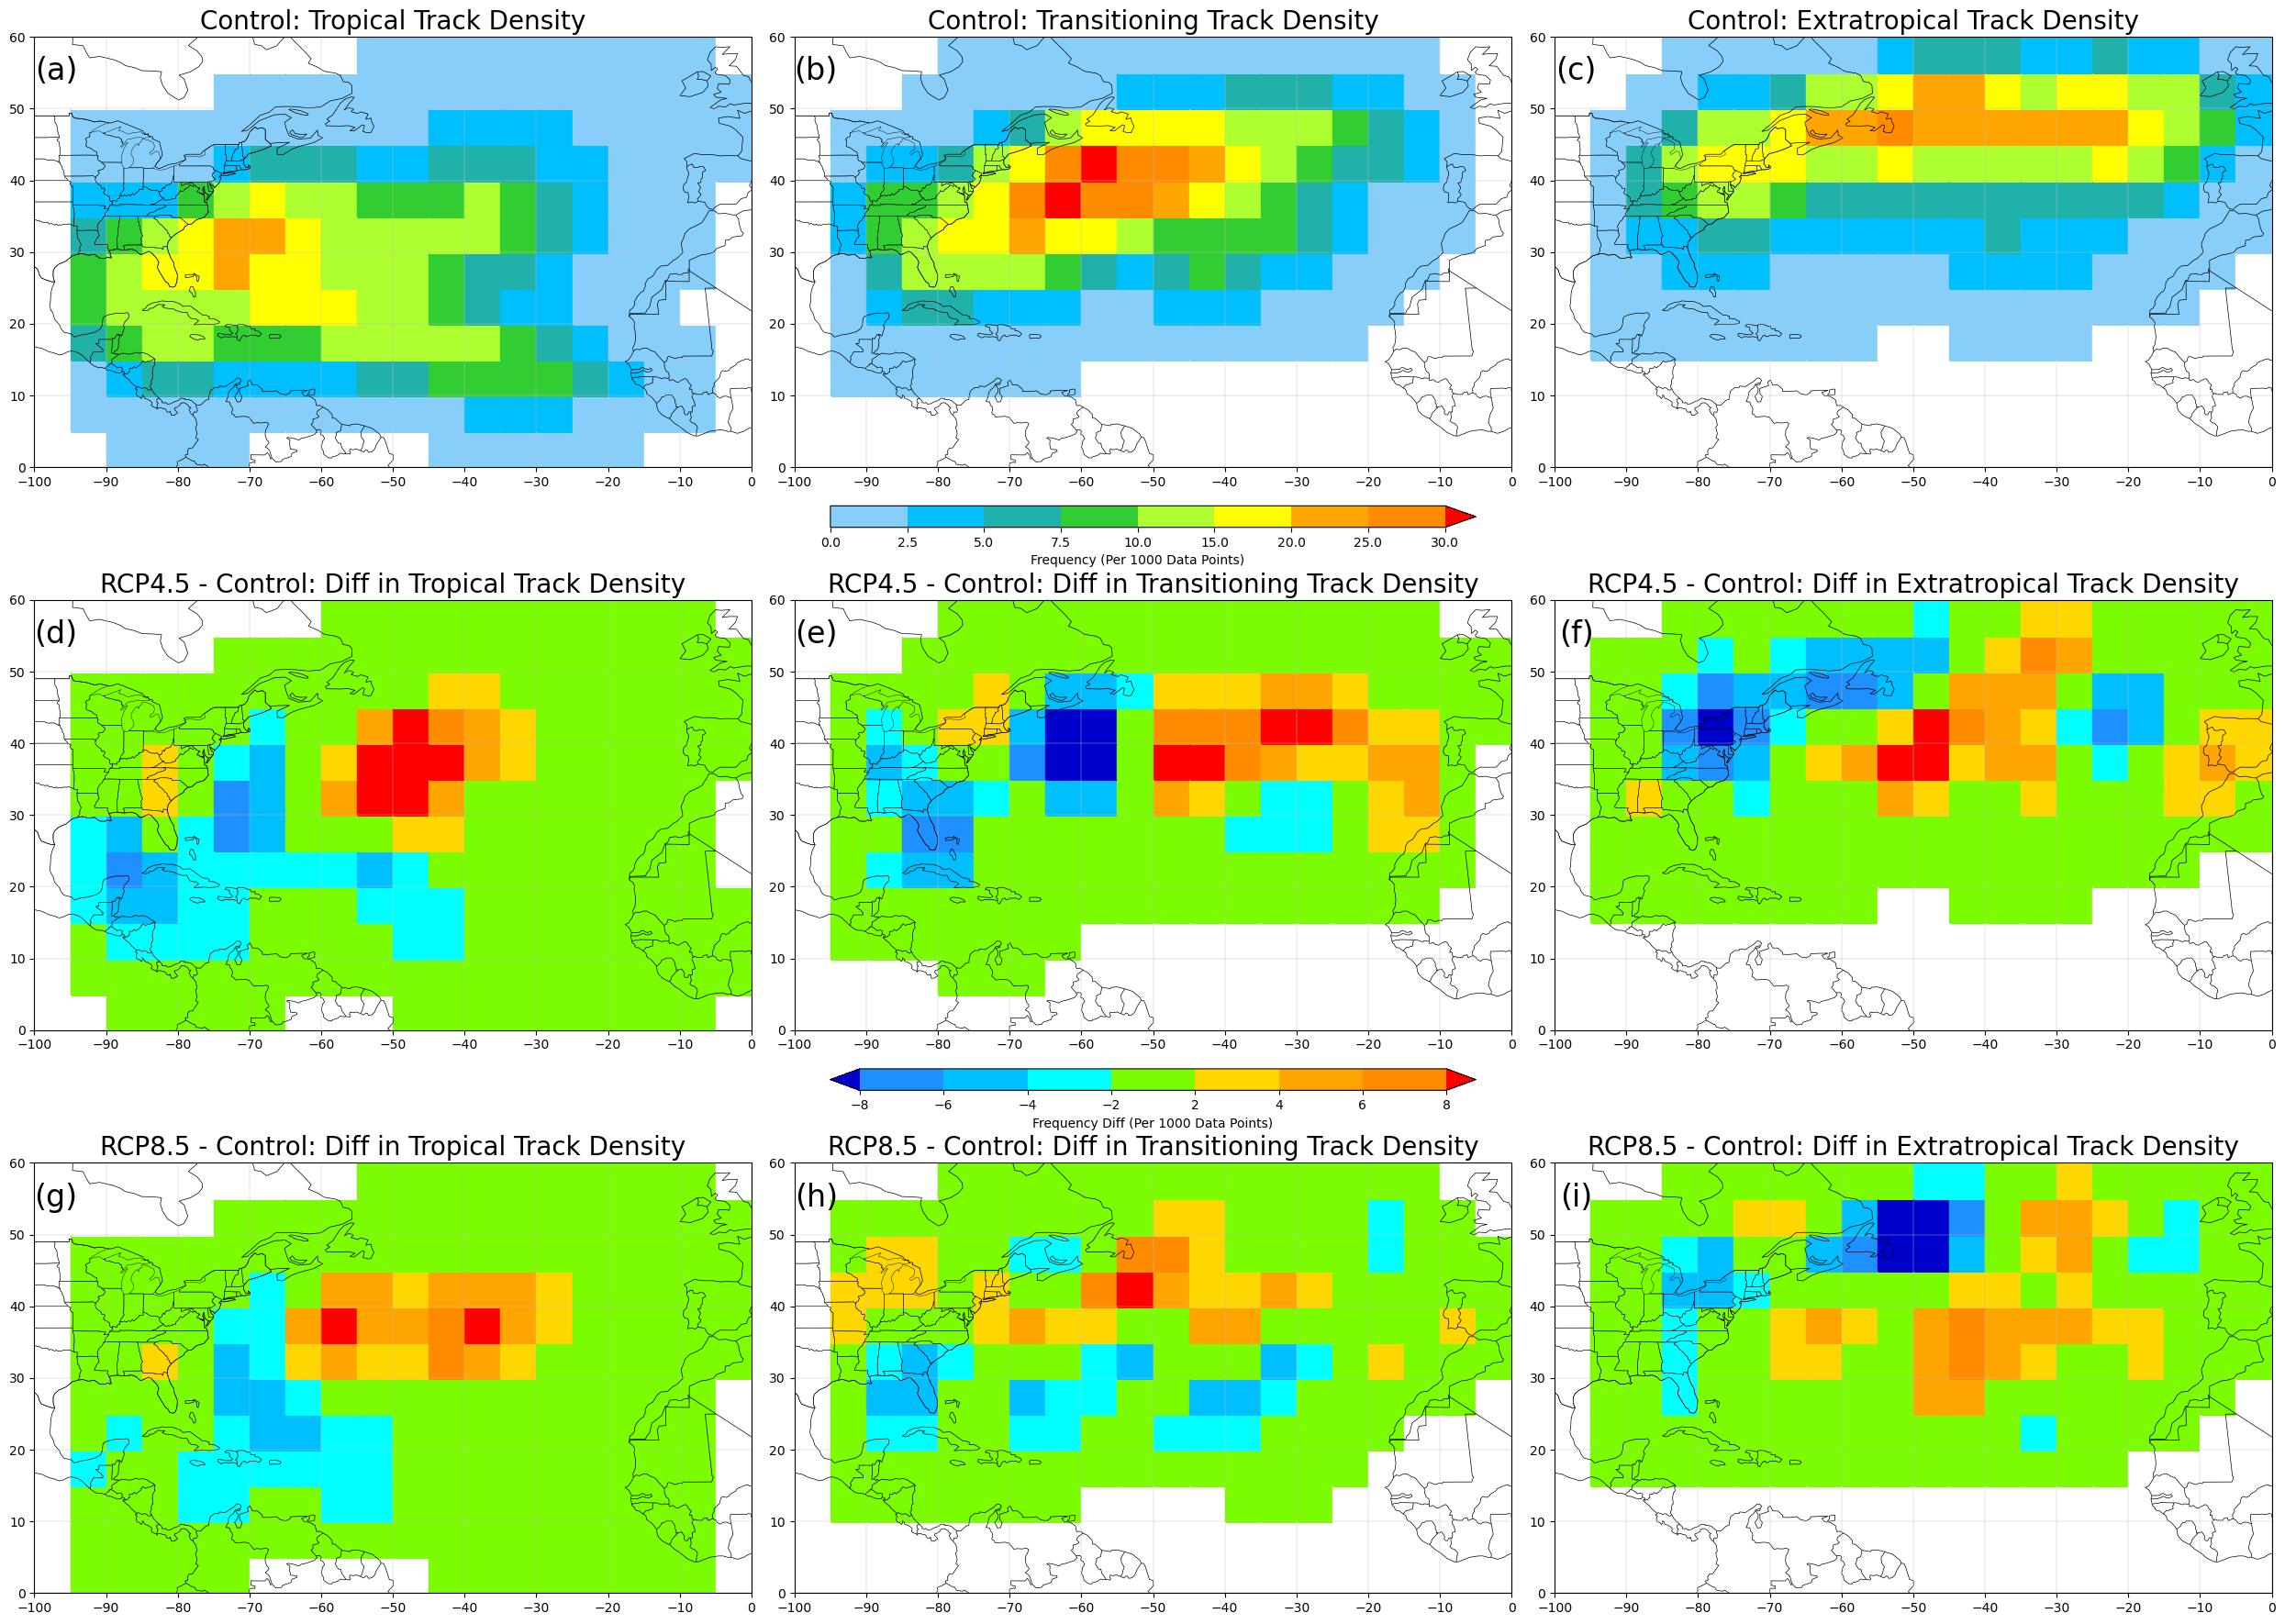

In [34]:
# Plot Differences Between Spatial Distributions By Storm Phase
Fig = pyplot.figure(figsize=(25,18))
Phase_Distr_Plot(Control_Data, "Control", 0, Phase_Bounds, Phase_Colours, True)
Phase_Diff_Plot(RCP45_Data, Control_Data, "RCP4.5", "Control", 1, Phase_Diff_Bounds, Phase_Diff_Colours, True)
Phase_Diff_Plot(RCP85_Data, Control_Data, "RCP8.5", "Control", 2, Phase_Diff_Bounds, Phase_Diff_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Phase_Diff.png', bbox_inches='tight')